# Proyek Analisis Data
* Nama        : Anggi Susanti  
* Email       : cnqqi5@gmail.com  
* Id Dicoding : anggisus  

# Pertanyaan Bisnis
* Bagaimana Demografi Pelanggan yang Kita Miliki?
* Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

# Library 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Data Wrangling
## Gathering Data

In [2]:
customers_df = pd.read_csv('Data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv('Data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
products_df = pd.read_csv('Data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
order_items_df = pd.read_csv('Data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Assessing Data
### Menilai Tabel customers_df

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai Tabel orders_df

In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai Tabel products_df

In [11]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai Tabel order_items_df

In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


## Cleaning Data
### Membersihkan Tabel customers_df

### Membersihkan Tabel orders_df

#### Memperbaiki Tipe Data

In [16]:
datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [17]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


#### Missing Values

In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaT,NaT,2018-10-01


In [20]:
orders_df.dropna(axis=0, inplace=True)

In [21]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Membersihkan Tabel products_df

#### Missing Value

In [22]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
products_df.dropna(axis=0, inplace=True)

In [24]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Membersihkan Tabel order_items_df
#### Memperbaiki tipe data

In [25]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

## Exploratory Data Analysis (EDA)

#### Explore customer_df

In [26]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [27]:
customers_df.customer_id.is_unique

True

In [28]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [29]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

#### Explore order_df

In [30]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
51246,f6bc6adf1c408945d9032cad7c5b07ce,25510bd947591a46fc2b5aa2a8caf0ea,delivered,2017-04-22 18:40:23,2017-04-22 18:50:17,2017-04-26 11:20:13,2017-05-03 11:11:51,2017-05-23
97848,4a8282603a79261a20695480745da4c3,d10364784b2595e87fbe4dac505d9fc1,delivered,2018-03-27 10:51:08,2018-03-28 02:55:21,2018-03-28 19:16:45,2018-04-03 21:51:01,2018-04-13
83158,4b6f2d3bd32baaae21249c217adcb5f3,dc1a9007706c85acb1f1bc89d6fc1d16,delivered,2018-07-14 11:53:01,2018-07-14 12:05:14,2018-07-17 14:16:00,2018-07-23 15:32:30,2018-08-16
92178,333d563479f452dc29b0a94c9c1be6c6,7f9d3722b8dc9b6099feb324a5845ea7,delivered,2018-01-14 12:58:36,2018-01-16 03:35:43,2018-01-17 19:16:12,2018-01-27 11:47:51,2018-02-16
29043,4bae63148c0e5ba0afb03cace07f580b,e8ef033012a92abd4fa76e7db69b124e,delivered,2018-05-10 11:06:18,2018-05-10 11:36:28,2018-05-15 08:27:00,2018-06-01 18:42:44,2018-06-08


In [31]:
orders_df.describe(include="all")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_33772\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future beh

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [32]:
customer_id_in_orders_df =  orders_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
13393,4ddafff707b98c2f941aca4da98b3044,0043d65f8039b4a4d43bc7b0f450ac2c,30570,belo horizonte,MG,Non Active
20100,65560c2f677f3f45909f7af70006649b,39e9cbba464b86fe7b4bf8d6dfa4b259,26140,belford roxo,RJ,Non Active
12041,793c6305b1e85bc03a82e464e28533fd,08e5b38d7948d37fbb2a59fc5e175ab1,58043,joao pessoa,PB,Non Active
82297,6238211c5b1c7812db24bd1aeb5fbc4e,28e4558f55bcf5b9f9ef85e9985f1810,69054,manaus,AM,Non Active
88579,ef8dc86ec14a507b281494aa6db1f53f,a3a5841028004f8640c85093ce7f74d3,38160,nova ponte,MG,Non Active


In [33]:
customers_df.groupby(by="status").customer_id.count()

status
Non Active    99441
Name: customer_id, dtype: int64

In [34]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Non Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Non Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Non Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Non Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Non Active
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,Non Active
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,Non Active
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Non Active
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,Non Active


<AxesSubplot:>

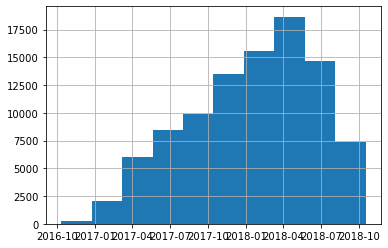

In [35]:
orders_df.order_delivered_customer_date.hist()

#### Explore product_df

In [36]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3546,394ccaadf8429703362e1796dccbf4d9,alimentos,38.0,1345.0,1.0,1400.0,16.0,20.0,15.0
765,3932e37f1f658768ac53fbe680f145bc,cama_mesa_banho,60.0,850.0,1.0,1100.0,40.0,10.0,30.0
27446,e67f32f0a3e66440cba31dc13d5cfb0b,telefonia,57.0,564.0,5.0,400.0,17.0,5.0,12.0
14150,6ba4d9e6b21481dcc4646250fa189ac1,eletronicos,41.0,790.0,5.0,477.0,18.0,16.0,14.0
22757,1c42a107473d6b20db8ac7772b870e33,cama_mesa_banho,50.0,164.0,2.0,1900.0,25.0,10.0,25.0


In [37]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [38]:
products_df.sort_values(by="product_category_name", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17366,01ea398598302b06869909ac5bfa5bcf,utilidades_domesticas,56.0,649.0,1.0,5000.0,35.0,28.0,32.0
22551,9f70acf998b0bd14652234075a19d358,utilidades_domesticas,25.0,326.0,1.0,1400.0,38.0,5.0,21.0
22575,2514ff519f69595934371404ff50911d,utilidades_domesticas,44.0,752.0,4.0,445.0,19.0,12.0,12.0
3319,eb464e3e06e2701a532c9f08a774d0d0,utilidades_domesticas,50.0,440.0,1.0,148.0,25.0,27.0,22.0
11749,021d39ee869e87d5288f4e731df4a90e,utilidades_domesticas,44.0,663.0,4.0,10350.0,102.0,15.0,40.0
...,...,...,...,...,...,...,...,...,...
28803,5b951e54437768080925aabe01e24348,agro_industria_e_comercio,54.0,747.0,1.0,380.0,22.0,11.0,14.0
9383,1f541a93f4fa4b8d15c7d5ed83836484,agro_industria_e_comercio,50.0,418.0,1.0,12850.0,41.0,42.0,47.0
19739,f075897551d47345068c1d90ed454fe1,agro_industria_e_comercio,48.0,948.0,1.0,6820.0,54.0,54.0,35.0
28858,fbec390384fbb8d53d97c29a5bbb26ae,agro_industria_e_comercio,38.0,145.0,1.0,1640.0,37.0,34.0,31.0


In [39]:
products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_photos_qty": "sum",
    "product_weight_g": ["min", "max"] ,
    "product_length_cm": ["min", "max"] ,
    "product_height_cm": ["min", "max"] ,
    "product_width_cm": ["min", "max"]
    
})
     

product_id product_photos_qty product_weight_g  \
                             nunique                sum              min   
product_category_name                                                      
agro_industria_e_comercio         74              171.0             50.0   
alimentos                         82              159.0             75.0   
alimentos_bebidas                104              197.0             50.0   
artes                             55              119.0            100.0   
artes_e_artesanato                19               57.0            100.0   
...                              ...                ...              ...   
sinalizacao_e_seguranca           93              231.0            100.0   
tablets_impressao_imagem           9               27.0            100.0   
telefonia                       1134             3129.0             50.0   
telefonia_fixa                   116              347.0             50.0   
utilidades_domesticas           2335             5167.0             50.0   

                                   product_length_cm        product_height_cm  \
                               max               min    max               min   
product_category_name                                                           
agro_industria_e_comercio  30000.0              11.0   99.0               2.0   
alimentos                   8238.0              16.0   44.0               4.0   
alimentos_bebidas          10800.0              16.0   57.0               2.0   
artes                      15400.0              16.0  100.0               2.0   
artes_e_artesanato          6850.0              16.0  105.0               2.0   
...                            ...               ...    ...               ...   
sinalizacao_e_seguranca    27100.0              16.0  100.0               2.0   
tablets_impressao_imagem    1100.0              16.0   60.0               3.0   
telefonia                   8100.0              12.0   40.0               2.0   
telefonia_fixa              6050.0              14.0  100.0               2.0   
utilidades_domesticas      30000.0              10.0  105.0               2.0   

                                 product_width_cm        
                             max              min   max  
product_category_name                                    
agro_industria_e_comercio  105.0             10.0  80.0  
alimentos                   52.0             11.0  36.0  
alimentos_bebidas           40.0             11.0  30.0  
artes                       62.0             11.0  70.0  
artes_e_artesanato          25.0             11.0  65.0  
...                          ...              ...   ...  
sinalizacao_e_seguranca    105.0             11.0  53.0  
tablets_impressao_imagem    27.0             11.0  40.0  
telefonia                   51.0              8.0  30.0  
telefonia_fixa              30.0              9.0  33.0  
utilidades_domesticas      105.0             11.0  90.0  

[73 rows x 10 columns]

#### Explore order_items_df

In [40]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
24632,3817a2f8b9b02eda56309cd9960453c2,1,b296b1ee06b6739f8bc6b1d41d06dbe0,5cf13accae3222c70a9cac40818ae839,2017-04-13 18:50:17,84.5,15.80
102031,e78e6c2d9d913cda60562cd825c90374,1,3625fbaf8284047185fb0351f2f84ae3,ef990a83bbea832f36ebe81376335aa8,2018-01-29 07:38:23,169.9,16.99
75081,ab0a259100a72a01f979cc26705316a4,1,46fd22a153db867285b826a2c62b446b,ceaec5548eefc6e23e6607c5435102e7,2018-04-24 04:10:10,515.0,30.46
101010,e51a9885ddaf8cc8e4a5f760fa7992bb,1,092eff69a9499b052a2258f502ea0775,1ce3ae5a399804d1a87e706f8a813c3e,2018-08-08 21:25:19,39.9,22.21
26178,3b877e13f7c459f7a8f3015dd9bcc2ec,1,e316e505ab5f17bb7fcfed3dcff53a3e,b4ffb71f0cb1b1c3d63fad021ecf93e1,2018-08-09 18:55:10,50.0,15.45


In [41]:
order_items_df.describe(include="all")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33772\3210315173.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


#### Explore orders_df & customers_df

In [42]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Non Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Non Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Non Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Non Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Non Active


In [43]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: order_id, dtype: int64

In [44]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

#### Explore products_df & order_items_df

In [45]:
products_order_items_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
products_order_items_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


#### Explore all data

In [46]:
products_order_items_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": "sum"
})
     

,product_id,price
product_category_name,,
agro_industria_e_comercio,74,72530.47
alimentos,82,29393.41
alimentos_bebidas,104,15179.48
artes,55,24202.64
artes_e_artesanato,19,1814.01
...,...,...
sinalizacao_e_seguranca,93,21509.23
tablets_impressao_imagem,9,7528.41
telefonia,1134,323667.53


In [47]:
products_order_items_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,product_id,price
product_category_name,,
beleza_saude,2444,1258681.34
relogios_presentes,1329,1205005.68
cama_mesa_banho,3029,1036988.68
esporte_lazer,2867,988048.97
informatica_acessorios,1639,911954.32
...,...,...
flores,14,1110.04
casa_conforto_2,5,760.27
cds_dvds_musicais,1,730.00


### Explore All Data

In [48]:
all_df = pd.merge(
    left=products_order_items_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,b1a1199364a4a7fe27c4486ab63f550d,13848.0,mogi-guacu,SP,Non Active
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,4b86049cb99e4aa774031daa9cd18f18,20551.0,rio de janeiro,RJ,Non Active
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,f63805d9c7edb84d92413af34b86a39c,5821.0,sao paulo,SP,Non Active
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,619e926d09b26efbd5180368b1ddc874,2018.0,sao paulo,SP,Non Active
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,ad353b4fb0e294adc4eda48af73e68a6,5835.0,sao paulo,SP,Non Active


In [49]:
all_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "product_photos_qty": "sum",
    "price": "sum"
})

product_photos_qty   price
customer_city       product_category_name                             
abadia dos dourados cool_stuff                             1.0  199.00
                    esporte_lazer                          1.0  120.00
                    livros_interesse_geral                 2.0   39.90
abadiania           eletroportateis                        6.0  949.99
abaete              bebes                                  1.0   65.00
...                                                        ...     ...
ze doca             bebes                                  4.0   74.80
                    esporte_lazer                          6.0  149.90
                    ferramentas_jardim                     1.0   39.90
                    instrumentos_musicais                  5.0  359.00
zortea              informatica_acessorios                 3.0   69.90

[24911 rows x 2 columns]

In [50]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "product_photos_qty": "sum",
    "price": "sum"
})
     

product_photos_qty    price
customer_state product_category_name                                   
AC             artigos_de_natal                            1.0    69.90
               automotivo                                  9.0   540.98
               bebes                                       5.0   697.84
               beleza_saude                                9.0  1386.58
               brinquedos                                 13.0   234.79
...                                                        ...      ...
TO             portateis_casa_forno_e_cafe                 7.0  1999.00
               relogios_presentes                         80.0  4920.89
               telefonia                                  57.0  1268.12
               telefonia_fixa                              6.0  1390.99
               utilidades_domesticas                      31.0   926.17

[1362 rows x 2 columns]

In [51]:
all_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,39952,5003084.01
RJ,12169,1737118.35
MG,11188,1534285.28
RS,5266,718375.87
PR,4855,657744.28
SC,3492,500165.47
BA,3215,487660.19
DF,2050,293919.59
GO,1911,274306.59


# Visualization & Explanatory Analysis
## Bagaimana Demografi Pelanggan yang Kita Miliki?
### Berdasarkan "State"

In [52]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,customer_state,customer_count
0,AC,78
1,AL,393
2,AM,144
3,AP,67
4,BA,3215
5,CE,1265
6,DF,2050
7,ES,1978
8,GO,1911
9,MA,708


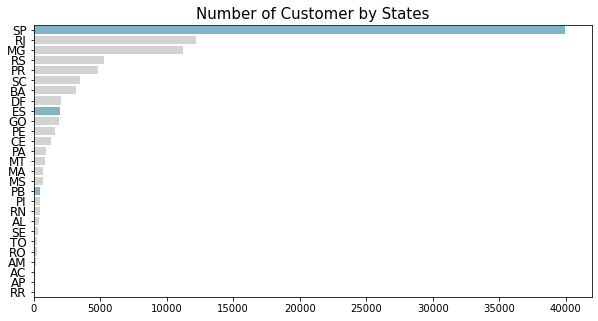

In [53]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sn.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [54]:
sum_order_items_df = all_df.groupby("product_category_name").product_photos_qty.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name,product_photos_qty
0,moveis_decoracao,20820.0
1,esporte_lazer,18959.0
2,beleza_saude,17680.0
3,cama_mesa_banho,16639.0
4,utilidades_domesticas,16183.0
5,relogios_presentes,15019.0
6,informatica_acessorios,13594.0
7,telefonia,13193.0
8,brinquedos,11463.0
9,automotivo,10645.0


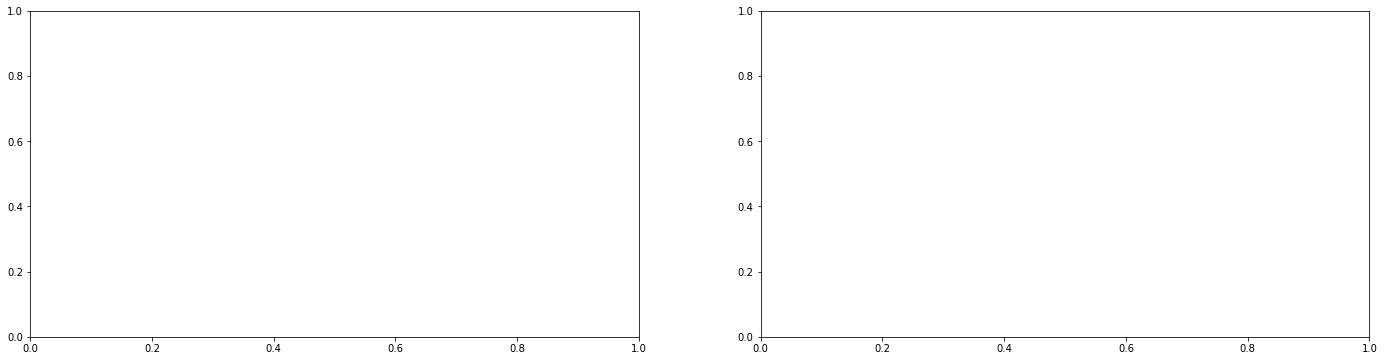

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

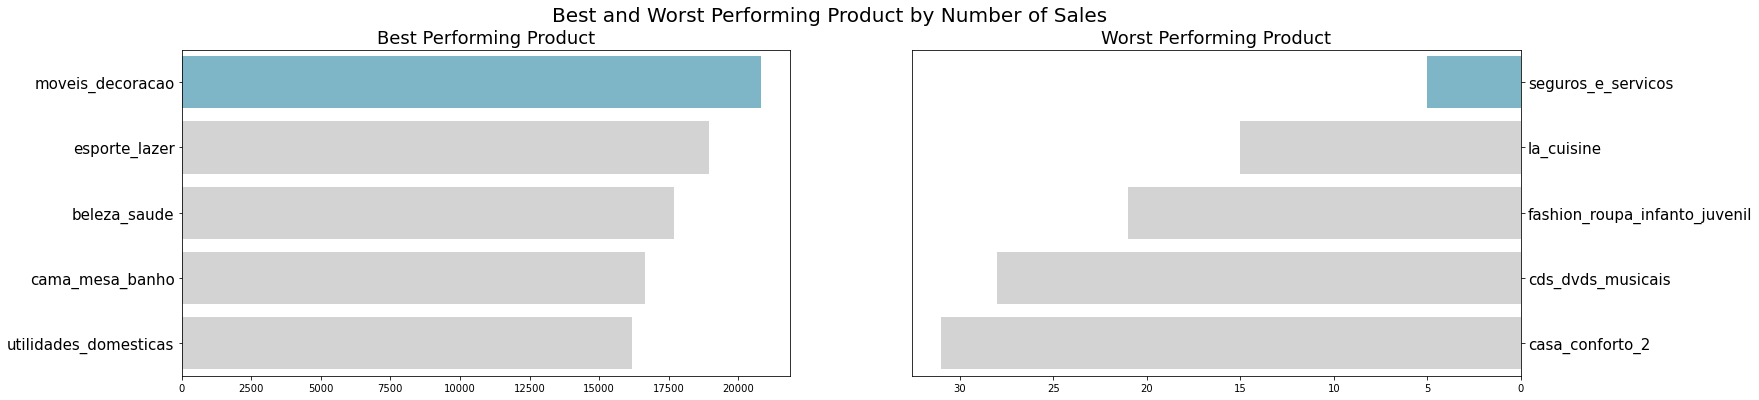

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sn.barplot(x="product_photos_qty", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sn.barplot(x="product_photos_qty", y="product_category_name", data=sum_order_items_df.sort_values(by="product_photos_qty", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

# RFM Analysis

In [79]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_estimated_delivery_date": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-12-04,1,89.80
1,000161a058600d5901f007fab4c27140,2017-08-04,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-22,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-09-14,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-18,1,93.00


In [80]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_estimated_delivery_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-12-04,1,89.80,325
1,000161a058600d5901f007fab4c27140,2017-08-04,1,54.90,447
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-22,1,179.99,582
3,0002414f95344307404f0ace7a26f1d5,2017-09-14,1,149.90,406
4,000379cdec625522490c315e70c7a9fb,2018-04-18,1,93.00,190


In [59]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,325
1,000161a058600d5901f007fab4c27140,1,54.90,447
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,582
3,0002414f95344307404f0ace7a26f1d5,1,149.90,406
4,000379cdec625522490c315e70c7a9fb,1,93.00,190


In [60]:
rfm_df.describe()

,frequency,monetary,recency
count,95129.0,95129.000000,95129.000000
mean,1.0,137.144667,271.534811
std,0.0,208.909695,151.108484
min,1.0,0.850000,0.000000
25%,1.0,45.900000,150.000000
50%,1.0,86.000000,251.000000
75%,1.0,149.900000,385.000000
max,1.0,13440.000000,751.000000


In [61]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
67759,b5c1c56fe1ec3cec6893b98d90a339bd,1,849.00,0
79093,d4217fcb991f5bc95ee2f5d7fd903cad,1,44.90,2
77545,cff98faaf25e1b86a439bf5556e6cae9,1,35.33,8
52084,8c551766dbe7cb34777c4e221a6189ef,1,207.00,9
83756,e103fb520157dd48c4828df29d466e50,1,18.90,10


In [62]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.8,325
63416,aa5c0aaed0105f447bd7e6198ae88108,1,103.0,45
63425,aa5f87b79875f43b90b310decb62356e,1,135.0,345
63424,aa5f5931b8901ae1ca4b8302f9b94c02,1,79.0,352
63423,aa5e99afaf6a4dce3da0dee9f41beac8,1,145.0,155


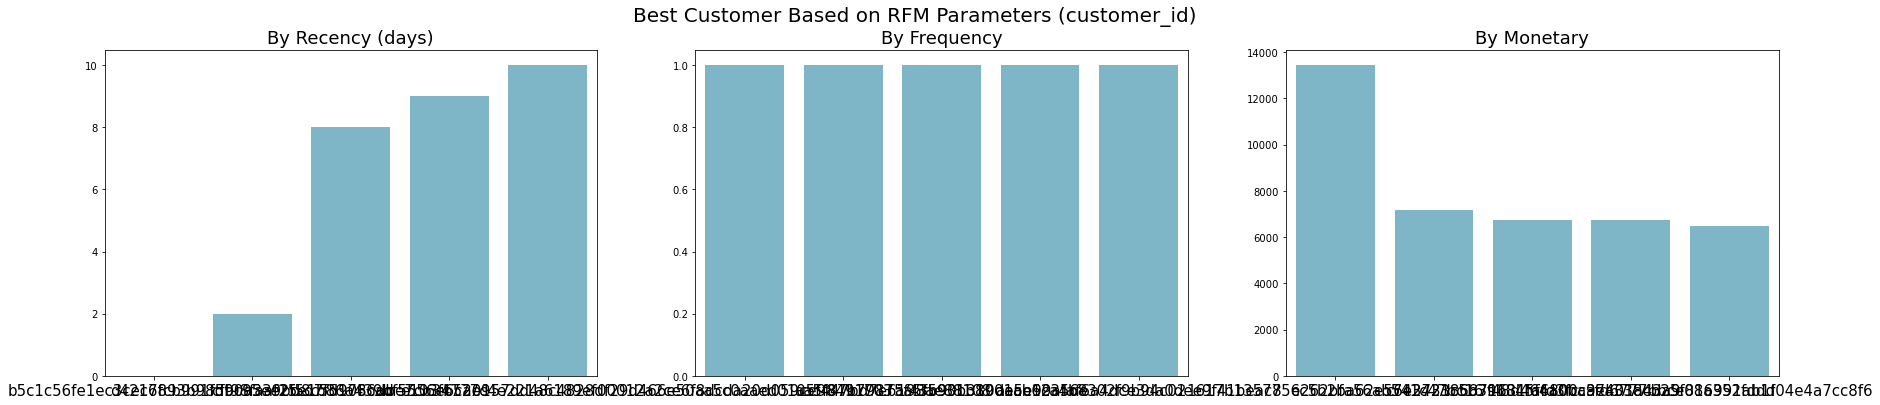

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sn.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sn.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sn.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [64]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,325,31823.0,47565.0,48792.0
1,000161a058600d5901f007fab4c27140,1,54.90,447,15184.0,47565.0,30202.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,582,2160.0,47565.0,77317.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,406,20414.0,47565.0,71149.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,190,62187.0,47565.0,51170.5


In [65]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,325,33.452470,100.0,51.290353
1,000161a058600d5901f007fab4c27140,1,54.90,447,15.961484,100.0,31.748468
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,582,2.270601,100.0,81.276477
3,0002414f95344307404f0ace7a26f1d5,1,149.90,406,21.459282,100.0,74.792124
4,000379cdec625522490c315e70c7a9fb,1,93.00,190,65.371233,100.0,53.790642


In [66]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)


,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.11
1,000161a058600d5901f007fab4c27140,2.42
2,0001fd6190edaaf884bcaf3d49edf079,3.73
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.42
5,0004164d20a9e969af783496f3408652,2.51
6,000419c5494106c306a97b5635748086,2.32


### Segmentasi customer berdasarkan RFM_score

In [67]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.11,Medium value customer
1,000161a058600d5901f007fab4c27140,2.42,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.73,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.42,Medium value customer
5,0004164d20a9e969af783496f3408652,2.51,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.62,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.81,Low value customers
9,000598caf2ef4117407665ac33275130,4.97,Top customers


In [68]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15476
1,Low value customers,40004
2,Medium value customer,33187
3,Top customers,5384
4,lost customers,1078


In [69]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

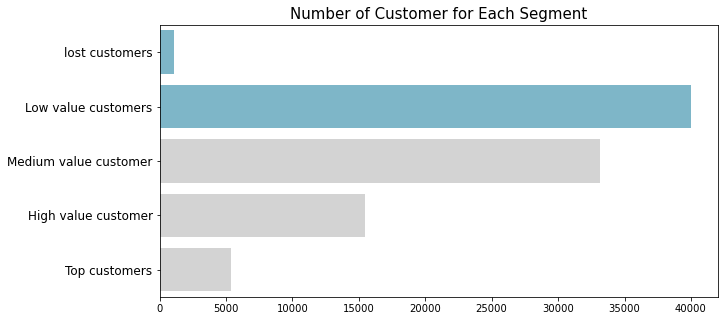

In [70]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sn.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()
     

In [71]:
all_df.to_csv("all_data.csv", index=False)